### `Тестирование`

In [3]:
# test_python.py

import unittest # найболее популярныцй способ тестирования

class TestPython(unittest.TestCase):
    def test_float_to_int_coercion(self):
        self.asserEqual(1, int(1.0))
        
    def test_get_empty_dict(self):
        self.assertIsNone({}.get('key'))
        
    def test_trueness(self):
        self.assertTrue(bool(10))

## Консоль
### > python3 -m unittest filename.py
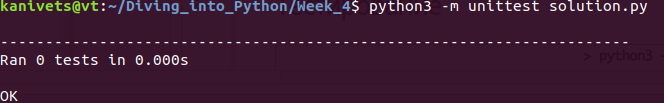

In [5]:
import unittest

class TestDivision(unittest.TestCase):
    def test_integer_division(self):
        self.assertIs(10 / 4, 2)

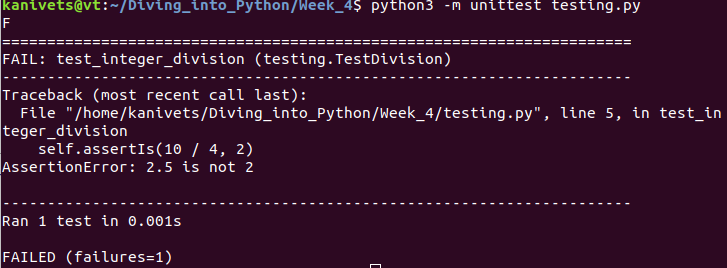

In [18]:
import requests
import json
class Asteroid:
    BASE_API_URL = 'https://api.nasa.gov/neo/rest/v1/neo/{}?\
api_key=DEMO_KEY'
    
    def __init__(self, spk_id):
        self.api_url = self.BASE_API_URL.format(spk_id)
        
    def get_data(self):
        return requests.get(self.api_url).json()
    
    @property
    def name(self):
        return self.get_data()['name']
    
    @property
    def diameter(self):
        return int(self.get_data()['estimated_diameter']['meters']
                   ['estimated_diameter_max'])

In [19]:
apophis = Asteroid(2099942)
print(f'Name: {apophis.name}')
print(f'Diameter: {apophis.diameter} m')

Name: 99942 Apophis (2004 MN4)
Diameter: 682 m


In [20]:
import requests
import json
import unittest
from unittest.mock import patch

from asteroid import Asteroid

class TestAsteroid(unittest.TestCase):
    
    def setUp(self):
        self.asteroid = Asteroid(2099942)
        
    def mocked_get_data(self):
        with open('apophis_fixture.txt') as f:
            return json.loads(f.read())
        
    @patch('asteroid.Asteroid.get_data', mocked_get_data)
    def test_name(self):
        self.assertEqual(
            self.asteroid.name, '99942 Apophis (2004 MN4)'
        )    
    @patch('asteroid.Asteroid.get_data', mocked_get_data)
    def test_diameter(self):
        self.assertEqual(self.asteroid.diameter, 682)

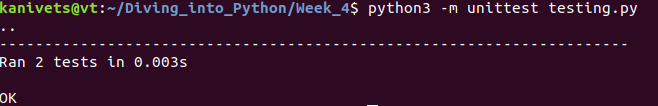